<a href="https://colab.research.google.com/github/yuli4ka/fontRecognition/blob/main/fontRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
FONTS_TO_TRAIN = ['PALATINO', 'STYLUS', 'NINA', 'GOUDY', 'ARIAL', 'TIMES']

In [2]:
import zipfile
import urllib.request
import sys
import random
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import os

In [3]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adagrad
from keras.constraints import maxnorm
from keras.regularizers import l2
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from google.colab.patches import cv2_imshow

In [4]:
np.random.seed(42) 

In [5]:
download = "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip"

with urllib.request.urlopen( download ) as url:
  output = open("./fonts.zip", "wb")
  output.write(url.read())
  output.close()

zip_ref = zipfile.ZipFile("./fonts.zip", 'r')
zip_ref.extractall("./fonts/")
zip_ref.close()

In [6]:
data = pd.concat([pd.read_csv("./fonts/"+name+".csv") for name in FONTS_TO_TRAIN]).sample(frac=1)

X = data.iloc[:,12:].values
X = np.true_divide(X,255)

idx_to_label = {idx:name for idx,name in enumerate(data.font.unique())}
label_to_idx = dict([[v,k] for k,v in idx_to_label.items()])

Y=data['font'].values
Y = to_categorical(list(map(lambda x : label_to_idx[x], Y)), num_classes=len(data.font.unique()))

splitpoint = int(math.floor(len(X)*0.8))

X_train, X_test = X[:splitpoint], X[splitpoint:]
Y_train, Y_test = Y[:splitpoint], Y[splitpoint:]

X_train = np.reshape(X_train,(-1,20,20,1))
X_test = np.reshape(X_test,(-1,20,20,1))

In [7]:
print("train: ", X_train.shape)
print("test: ", X_test.shape)

train:  (38816, 20, 20, 1)
test:  (9705, 20, 20, 1)


In [8]:
history = []
for i in range(1, 10):
  model = Sequential()

  model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(20,20,1))) 
  model.add(Convolution2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(len(FONTS_TO_TRAIN), activation='softmax'))

  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  model.fit(X_train, Y_train, batch_size=32, verbose=1, epochs=i)

  print(
    "Accuracy for", i, "epoch:",
    round(model.evaluate(X_test, Y_test)[1], 2) * 100,
    "%"
  )

  history.append([i, model.evaluate(X_test, Y_test)[1]])

304/304 [==============================] - 2s 6ms/step - loss: 0.8053 - accuracy: 0.7119
Accuracy for 1 epoch: 71.0 %
304/304 [==============================] - 2s 7ms/step - loss: 0.8053 - accuracy: 0.7119
Epoch 1/2
1213/1213 [==============================] - 30s 25ms/step - loss: 0.9894 - accuracy: 0.6511
Epoch 2/2
304/304 [==============================] - 2s 6ms/step - loss: 0.6953 - accuracy: 0.7488
Accuracy for 2 epoch: 75.0 %
304/304 [==============================] - 2s 6ms/step - loss: 0.6953 - accuracy: 0.7488
Epoch 1/3
1213/1213 [==============================] - 29s 24ms/step - loss: 1.0116 - accuracy: 0.6439
Epoch 2/3
1213/1213 [==============================] - 29s 24ms/step - loss: 0.8215 - accuracy: 0.7084
Epoch 3/3
304/304 [==============================] - 2s 6ms/step - loss: 0.6348 - accuracy: 0.7652
Accuracy for 3 epoch: 77.0 %
304/304 [==============================] - 2s 6ms/step - loss: 0.6348 - accuracy: 0.7652
Epoch 1/4
1213/1213 [=============================

Text(0, 0.5, 'accuracy')

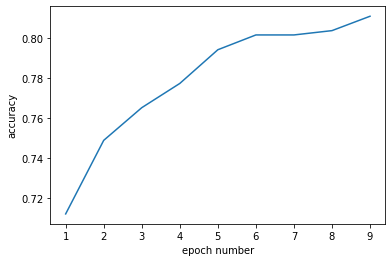

In [9]:
plt.plot(
    [x[0] for x in history], 
    [x[1] for x in history]
)
plt.xlabel('epoch number')
plt.ylabel('accuracy')